# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ied Mubaraque Sultan Salahuddine El Ayyubie
- **Email:** ayyubieied@gmail.com
- **ID Dicoding:** ayyubie

## Menentukan Pertanyaan Bisnis

- Produk mana yang memiliki order terbesar? dan Produk mana yang memiliki order terkecil?
- Bagaimana performa penjualan platform E-commerce tersebut setiap bulannya?
- Berapa pengeluaran customer pada platform E-commerce dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import seaborn as sns
import unidecode
from scipy import stats
from datetime import timedelta

## Data Wrangling

### Gathering Data

In [6]:
customers = pd.read_csv('customers_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')
items = pd.read_csv('order_items_dataset.csv')
payments = pd.read_csv('order_payments_dataset.csv')
reviews = pd.read_csv('order_reviews_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')
products = pd.read_csv('products_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')

data = {'customers': customers,
        'geolocation': geolocation,
        'items': items,
        'payments': payments,
        'reviews': reviews,
        'orders': orders,
        'category': category,
        'products': products,
        'sellers': sellers,}

#### Selanjutnya saya akan memastikan bahwa data tersebut telah terisi oleh datasets yang semestinya

**1. Customers**



In [7]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**2. Geolocation**

In [8]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**3. Order Items**

In [9]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**4. Order Payments**

In [10]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**5. Order Reviews**

In [11]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**6. Order**

In [12]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**7. Product Category**

In [13]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**7. Product**

In [14]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**8. Seller**

In [15]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Mengecek Data Types dari keseluruhan datasets

In [16]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512742 entries, 0 to 512741
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  512742 non-null  int64  
 1   geolocation_lat              512742 non-null  float64
 2   geolocation_lng              512741 non-null  float64
 3   geolocation_city             512741 non-null  o

(!) Berdasarkan hasil observasi pada keseluruhan datatypes, terdapat kesalahan dalam jenis data pada seluruh kolom yang berhubungan dengan tanggal (dates) yang awalnya berupa objek, tetapi seharusnya berupa tipe data datetime.

#### Mengecek missing values dari keseluruhan Datasets

In [17]:
missing_values = {}

for df_name, df in data.items():
    missing_values[df_name] = df.isna().sum()
    print(df_name, '\n', missing_values[df_name], '\n')

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

geolocation 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                1
geolocation_city               1
geolocation_state              1
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

reviews 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

orders 
 order_id  

#### Mengecek Duplicate values dari keseluruhan Datasets

In [18]:
duplicate = {}
sample = {}

for df_name, df in data.items():
    duplicate[df_name] = df.duplicated().sum()
    sample[df_name] = len(df)  # Calculate the total number of samples

duplicate_counts_df = pd.DataFrame.from_dict(duplicate, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(sample, orient='index', columns=['Total Sample Count'])

pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
customers,99441,0
geolocation,512742,157650
items,112650,0
payments,103886,0
reviews,99224,0
orders,99441,0
category,71,0
products,32951,0
sellers,3095,0


### Cleaning Data

#### Merapihkan Datatypes yang belum sesuai

**1. Mengubah datatypes dari kolom Orders**

In [19]:
order_datetime = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in order_datetime:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

**2. Mengubah datatypes dari kolom Items**

In [20]:
items_datetime = ["shipping_limit_date"]

for column in items_datetime:
  data['items'][column] = pd.to_datetime(data['items'][column])

**3. Mengubah datatypes dari kolom Reviews**

In [21]:
reviews_datetime = ["review_creation_date","review_answer_timestamp"]

for column in reviews_datetime:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])

#### Merapihkan Missing Values atau Data Nulls

In [22]:
data['reviews'].isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

(!) mengubah nilai column review_comment_title & review_comment_message yang memiliki null value dengan default string "No Tittle" & "No Message"

In [23]:
data['reviews']["review_comment_title"].fillna("No Title", inplace=True)
data['reviews']["review_comment_message"].fillna("No Message", inplace=True)

Jumlah null value setelah dibersihkan

In [24]:
data['reviews'].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Merapihkan Duplicates Data

In [25]:
data['geolocation'].duplicated().sum()

157650

(!) Menghapus data yang duplikat

In [26]:
data['geolocation'].drop_duplicates(inplace=True)

Jumlah duplicates data setelah dibersihkan

In [27]:
data['geolocation'].duplicated().sum()

0

## Exploratory Data Analysis (EDA)

#### Explore datasets customers

In [28]:
data['customers'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
89271,95c4015e1361fee6cf2367266ae409cb,6d0845fb78d828c58be539febc4d4a8b,93042,sao leopoldo,RS
92220,f6fb09a1fc38571f394ffb6ce4116ef3,d792afcd46fadcc021eb23004a1be849,58020,joao pessoa,PB
23582,2b9f077c74b850eb1b3e6c5750233baa,982dd12913a636c1b844398791910907,72620,brasilia,DF
40194,741488a61f59b1f0a0e02501db47fd8e,96b3b102cb9e8182d068806b7298549a,2365,sao paulo,SP
53142,7081962004875abb5b6710a4042b9ef7,330a0bc8887e4ceccf797f43afacb86a,80420,curitiba,PR
23064,b7eb8f8399336228bb39564d05bafbd6,761188065f84481a27d8a8d3da08fc60,32071,contagem,MG
92156,2cb34326c980c574f12aa7ea197afdbe,62aa2ce0e682ea58be2f6a47cc4db61a,70855,brasilia,DF
27978,65d82c4a61c5d879633df01f1352ba2a,9d8d6c0bbaaff906a6aa2a8f184b2834,75391,trindade,GO
45085,9fa2624b235740613073584d127daa3e,b1b97a3a6f1c11d0c0a76d0e5faf546d,9411,ribeirao pires,SP
59358,fe6104f311827c6da370d03f8d54df05,c21b6dcc17f61c4939d71093980517eb,11730,mongagua,SP


(!) Dikarenakan customer memiliki ID yang unuk, Kita dapat melihat pembeli terbanyak berasal dari kota mana

In [29]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

#### Explore datasets Payments

In [30]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
88099,077d6b93c4e88d06b124cf24fb67a28e,1,voucher,1,28.56
40120,4c4a931a93ef9f28f4746db1e2e0e753,1,credit_card,1,510.12
13954,b60cab8c479e1e80420cbe584d7aa9ac,2,voucher,1,38.14
85349,494f99ef42110a8d40dc585b177f2151,1,credit_card,1,56.60
68975,6ffc78c9003aa616f58b4de610bcce29,1,credit_card,4,94.74


In [31]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

#### Explore datasets Orders

In [32]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
17017,6bae400cefd788e2156ed4bfa090a986,8c0808d8499f18490444a09b7c54e9b5,delivered,2018-01-12 01:39:06,2018-01-12 01:49:41,2018-01-13 01:56:36,2018-01-18 21:08:34,2018-02-06
60040,1fb28905c05d166e536359d8f87de8ad,30b0e5b92581e38246993fe1808bdadf,delivered,2018-05-15 13:36:40,2018-05-16 13:33:39,2018-05-17 15:34:00,2018-05-22 20:03:32,2018-05-23
21563,ca7887c5152594f00b83af3cc8aef217,f506a3e6d91d7d32b36407d69d9d75b7,delivered,2017-12-30 16:25:37,2017-12-30 16:37:21,2018-01-03 18:46:45,2018-01-08 18:24:32,2018-01-29
20189,0cc14454cb400b7b154e0a45ffd5c2f9,6500983182f0ed3a2e92fcb7522a4832,delivered,2017-12-17 17:24:50,2017-12-17 18:34:05,2017-12-18 20:03:12,2017-12-20 15:27:45,2018-01-05
56059,edd810dc89c1eed484c29e04e184e8cf,dd0913a1304652981fc83655421b3f8c,delivered,2018-02-27 19:14:19,2018-02-27 19:30:22,2018-03-01 00:04:57,2018-03-01 17:22:13,2018-03-13


In [33]:
delivery_time = data['orders']["order_delivered_customer_date"] - data['orders']["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
data['orders']["delivery_time"] = round(delivery_time/86400)

data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
79159,c4d21595038e045af516cfd9f1496c2d,a6a6191fdbe183b3891aed7908ca4640,delivered,2017-12-06 16:07:55,2017-12-06 16:15:32,2017-12-07 17:57:19,2017-12-21 01:45:02,2017-12-29,13.0
12053,8a3ec851fda600089ac1c69ca40215c0,ab4d3930d2f105d8591fe814d9c44e2d,delivered,2018-06-06 15:45:33,2018-06-06 16:14:11,2018-06-28 15:18:00,2018-07-03 09:39:00,2018-07-12,5.0
49718,dd623579d6b295a30527eb68420a5eeb,a45cd323d05696938412c8d9d9dc209e,delivered,2018-08-05 23:07:32,2018-08-05 23:24:18,2018-08-10 19:12:00,2018-08-13 14:08:41,2018-08-13,3.0
53886,4211e9c52967c6118ba50e4efde875a5,0ac2d5fc64bc66aaeaa727022aeb73f3,delivered,2018-01-25 11:36:13,2018-01-25 11:53:08,2018-01-29 18:39:01,2018-02-01 23:07:37,2018-02-09,3.0
4554,13ce532ef1a57ec06218af7cb3634241,ec8cce4c98a82dead34ffd130e9c6d85,delivered,2018-02-25 14:17:14,2018-02-25 14:30:29,2018-02-26 19:43:48,2018-03-03 20:18:48,2018-03-21,5.0


<Axes: >

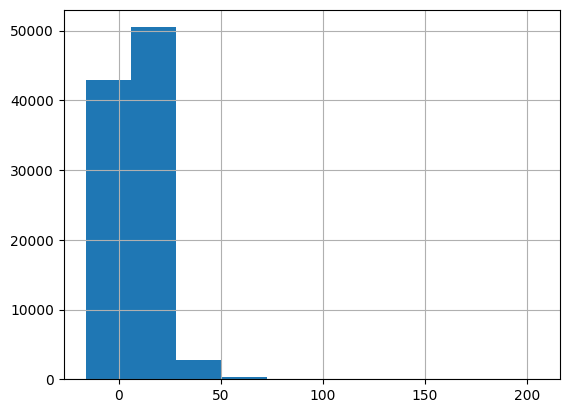

In [34]:
data['orders'].delivery_time.hist()

#### Explore datasets Customer & Orders

In [35]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [36]:
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [37]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [38]:
customers_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [39]:
customers_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

#### Explore datasets Payments & Reviews

In [40]:
order_payrev_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Message,2017-12-21,2017-12-22 01:10:39


In [41]:
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [42]:
order_payrev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No Title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No Title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Title,No Message,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No Message,2018-08-24,2018-08-25 02:24:54


In [43]:
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Explore Dataset Customer + Orders & Payments + Reviews

In [44]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=order_payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


#### Explore datasets Items & Sellers

In [45]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [46]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

#### Explore datasets Products & Category

In [47]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [48]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [49]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Explore Products + Category & Sellers + Items

In [50]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [51]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [52]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

#### Explore Geolocation

In [53]:
data['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
61638,3582,-23.553953,-46.494563,sao paulo,SP
147884,5813,-23.651594,-46.733167,sao paulo,SP
11837,1456,-23.578585,-46.689996,sao paulo,SP
72927,4012,-23.583123,-46.647918,sao paulo,SP
285452,13040,-22.943906,-47.057996,campinas,SP


In [56]:
data['geolocation'][data['geolocation']['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Merging All Data

In [58]:
df_all = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
df_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [59]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

## Visualization & Explanatory Analysis

#### 1. Produk mana yang memiliki order terbesar? dan Produk mana yang memiliki order terkecil?

In [60]:
sum_order_df = df_all.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_df = sum_order_df.rename(columns={"product_id": "products"})
sum_order_df = sum_order_df.sort_values(by="products", ascending=False)
sum_order_df = sum_order_df.head(10)

sum_order_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-65-4ce87a029af9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.head(5), palette=colors, ax=ax[0])
<ipython-input-65-4ce87a029af9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])


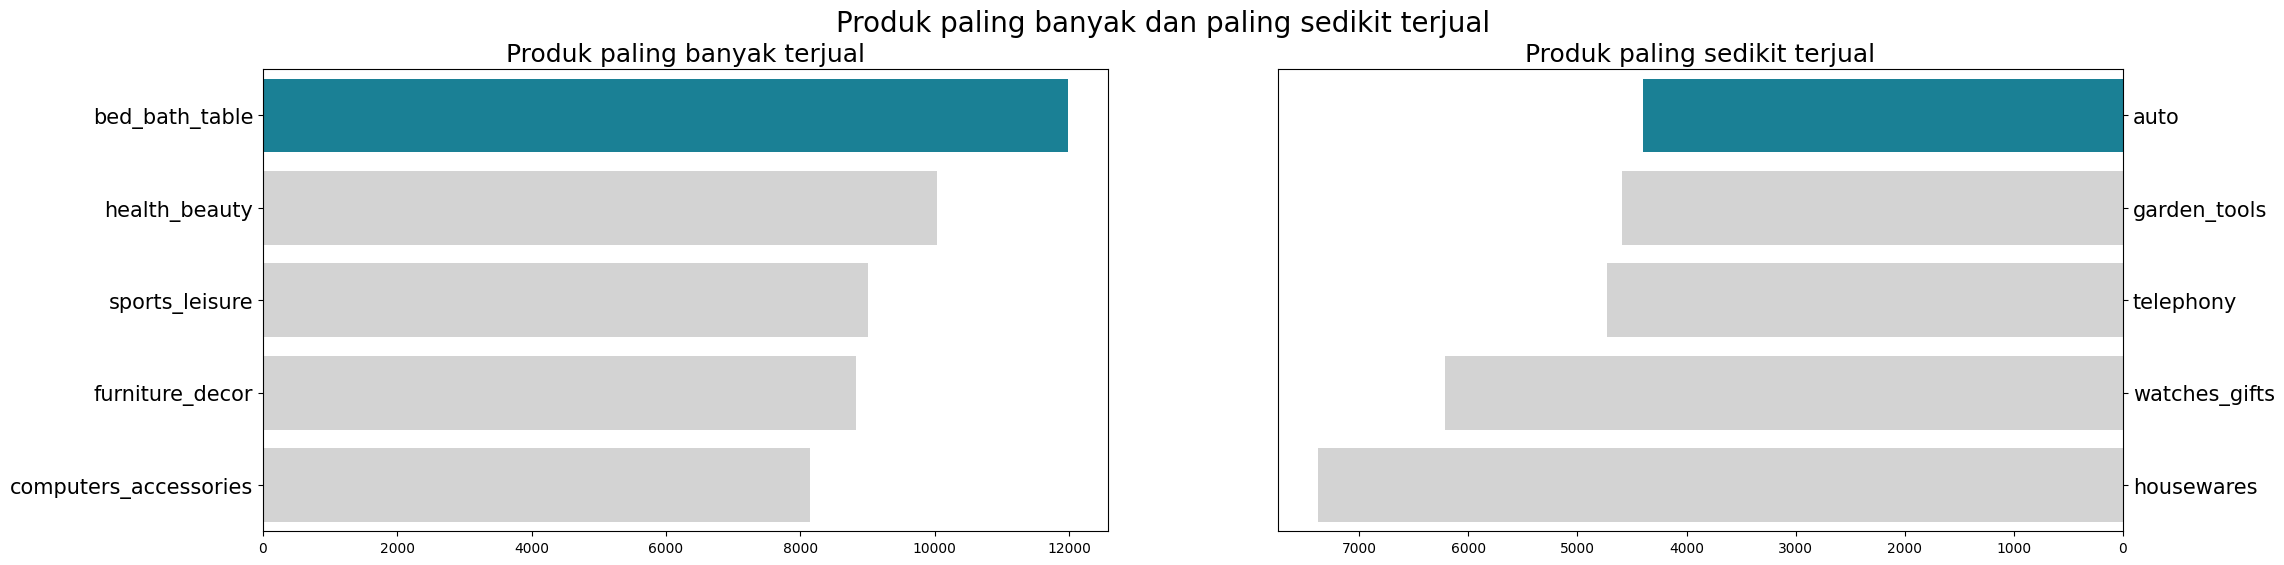

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

#### 2. Bagaimana performa penjualan platform E-commerce tersebut setiap bulannya?

In [ ]:
sells_monthly_df = df_all.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})

sells_monthly_df.index = sells_monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
sells_monthly_df = sells_monthly_df.reset_index()
sells_monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
sells_monthly_df = sells_monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

sells_monthly_df.sort_values(by='order_count')

In [ ]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

sells_monthly_df["month_numeric"] = sells_monthly_df["order_approved_at"].map(month_mapping)
sells_monthly_df = sells_monthly_df.sort_values("month_numeric")
sells_monthly_df = sells_monthly_df.drop("month_numeric", axis=1)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    sells_monthly_df["order_approved_at"],
    sells_monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

#### 3. Berapa pengeluaran customer pada platform E-commerce dalam beberapa bulan terakhir?

In [ ]:
spending_monthly_df = df_all.resample(rule='M', on='order_approved_at').agg({
    "payment_value":"sum"
})
spending_monthly_df.index = spending_monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
spending_monthly_df = spending_monthly_df.reset_index()
spending_monthly_df.rename(columns={
    "payment_value":"total_spend"
}, inplace=True)
spending_monthly_df = spending_monthly_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

spending_monthly_df.sort_values(by='total_spend')

In [ ]:
spending_monthly_df["month_numeric"] = spending_monthly_df["order_approved_at"].map(month_mapping)
spending_monthly_df = spending_monthly_df.sort_values("month_numeric")
spending_monthly_df = spending_monthly_df.drop("month_numeric", axis=1)

plt.figure(figsize=(10, 5))
plt.plot(
    spending_monthly_df["order_approved_at"],
    spending_monthly_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Total customer spending per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

- Produk mana yang memiliki Revenue terbesar? Apakah product dengan harga mahal menjamin mendapatkan revenue terbesar?

Berdasarkan data yang sudah diolah dan divisualisasikan pada sheet diatas, Maka di ketahui produk dengan perolehan order terbesar berada pada product dengan dengan category `Bed Bath Table`. Selain itu, Product dengan perolehan order terkecil berada pada product dengan category `security and services`

- Bagaimana performa penjualan platform E-commerce tersebut setiap bulannya?

Berdasarkan Line Graph diatas, Penjualan pada platform E-commerce tersebut sangat fluktuatif. Akan tetapi, dapat terlihat bahwa terdapat peningkatan penjualan yang fantastis dari Bulan `September ke November`, Yakni terdapat **Puncak pembelian minimum** pada bulan `September` dan mencapai **Puncak pembelian maksimum** pada bulan `November`

- Berapa pengeluaran customer pada platform E-commerce dalam beberapa bulan terakhir?

Berdasarkan data yang kita dapatkan dari pertanyaan sebelumnya, terdapat hubungan yang erat antara **Performa penjualan setiap bulan** dengan **pengeluaran customer beberapa bulan terakhir** dimana grafik yang ditujukan `Hampir Sama secara keseluruhan` antara satu sama lain yang mengartikan jumlah total pengeluaran customer sama dengan jumlah total pembelian produk setiap bulannya